The labels are in the format: class_name x_center y_center width height

Below is the validation code for the labels, with a couple of test cases

[['2', '0.783203', '0.434028', '0.138281', '0.126389']]


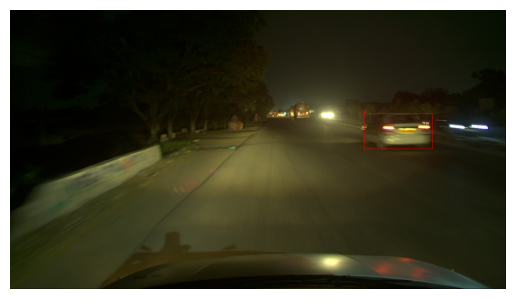

In [7]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Function to draw bounding boxes on the image
def draw_boxes(image_path, boxes):
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)
    
    for box in boxes:
        class_name, x_center, y_center, width, height = box
        x_center, y_center, width, height = float(x_center), float(y_center), float(width), float(height)
        
        # Convert center coordinates to top-left and bottom-right coordinates
        x1 = (x_center - (width / 2)) * image.width
        y1 = (y_center - (height / 2)) * image.height
        x2 = (x_center + (width / 2)) * image.width
        y2 = (y_center + (height / 2)) * image.height
        
        draw.rectangle([(x1, y1), (x2, y2)], outline="red")
        draw.text((x1, y1 - 10), class_name, fill="red")

    return image

# Path to the raw image and text file containing bounding box coordinates
image_path = "F:/2023-06-20_Night/camera/image_2023-06-20-20-20-15.122269.jpg"
text_file_path = "F:/2023-06-20_Night_YOLO/labels/image_2023-06-20-20-20-15.122269.txt"

# Read the bounding box coordinates from the text file
boxes = []
with open(text_file_path, 'r') as file:
    for line in file:
        box = line.strip().split()
        boxes.append(box)

# Draw bounding boxes on the image
annotated_image = draw_boxes(image_path, boxes)
print(boxes)

# Display the image with bounding boxes
plt.imshow(annotated_image)
plt.axis('off')
plt.show()

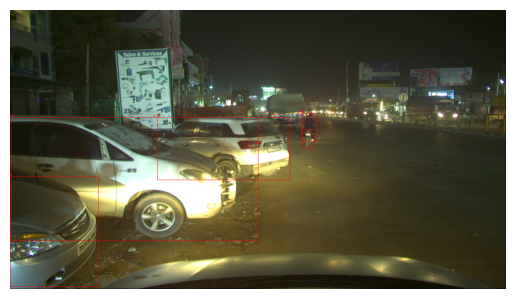

In [8]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Function to draw bounding boxes on the image
def draw_boxes(image_path, boxes):
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)
    
    for box in boxes:
        class_name, x_center, y_center, width, height = box
        x_center, y_center, width, height = float(x_center), float(y_center), float(width), float(height)
        
        # Convert center coordinates to top-left and bottom-right coordinates
        x1 = (x_center - (width / 2)) * image.width
        y1 = (y_center - (height / 2)) * image.height
        x2 = (x_center + (width / 2)) * image.width
        y2 = (y_center + (height / 2)) * image.height
        
        draw.rectangle([(x1, y1), (x2, y2)], outline="red")
        draw.text((x1, y1 - 10), class_name, fill="red")

    return image

# Path to the raw image and text file containing bounding box coordinates
image_path = "F:/2023-06-20_Night/camera/image_2023-06-20-20-41-29.303171.jpg"
text_file_path = "F:/2023-06-20_Night_YOLO/labels/image_2023-06-20-20-41-29.303171.txt"

# Read the bounding box coordinates from the text file
boxes = []
with open(text_file_path, 'r') as file:
    for line in file:
        box = line.strip().split()
        boxes.append(box)

# Draw bounding boxes on the image
annotated_image = draw_boxes(image_path, boxes)

# Display the image with bounding boxes
plt.imshow(annotated_image)
plt.axis('off')
plt.show()

Below is the code to convert labels to pixel coordinates

In [11]:
# Function to convert bounding box labels to pixel coordinates
def convert_labels_to_pixels(image_width, image_height, boxes):
    converted_boxes = []
    
    for box in boxes:
        class_name, x_center, y_center, width, height = box
        x_center, y_center, width, height = float(x_center), float(y_center), float(width), float(height)
        print("image width",image_width, image_height, x_center, y_center, width, height)
        # Convert center coordinates to pixel coordinates
        x1 = int((x_center - (width / 2)) * image_width)
        y1 = int((y_center - (height / 2)) * image_height)
        x2 = int((x_center + (width / 2)) * image_width)
        y2 = int((y_center + (height / 2)) * image_height)
        print("x1bbbbbb,u1: ",x1, y1, x2, y2)
        converted_boxes.append([class_name, x1, y1, x2, y2])
        print("Center", x_center*image_width, y_center*image_height)
    
    return converted_boxes

# Example usage
image_path = "F:/2023-06-20_Night/camera/image_2023-06-20-20-20-15.122269.jpg"
text_file_path = "F:/2023-06-20_Night_YOLO/labels/image_2023-06-20-20-20-15.122269.txt"

# Read image dimensions
image = Image.open(image_path)
image_width, image_height = image.size

# Read the bounding box coordinates from the text file
boxes = []
with open(text_file_path, 'r') as file:
    for line in file:
        box = line.strip().split()
        boxes.append(box)

# Convert bounding box labels to pixel coordinates
converted_boxes = convert_labels_to_pixels(image_width, image_height, boxes)

# Print the converted bounding box coordinates
for box in converted_boxes:
    print(box)

image width 1280 720 0.783203 0.434028 0.138281 0.126389
x1bbbbbb,u1:  914 267 1090 358
Center 1002.49984 312.50016
['2', 914, 267, 1090, 358]


Below code uses the pixel coordinates found above to make a box, and vaildate the pixel coordinates are accurate

In [1]:
import cv2

def draw_box_on_image(image_path, x1, y1, x2, y2):
    # Load the image
    image = cv2.imread(image_path)
    
    # Draw the box on the image
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
    # org = (914, 267)
    # forge = (1090, 358)
    # font = cv2.FONT_HERSHEY_SIMPLEX
    # color = (0, 0, 255)
    # cv2.putText(image, 'x1y1', org, font, 0.5, color, 1, cv2.LINE_AA, False)
    # cv2.putText(image, 'x2y2', forge, font, 0.5, color, 1, cv2.LINE_AA, False)
    
    # Display the image with the box
    cv2.imshow('Image with Box', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Example usage
image_path = 'F:/2023-06-20_Night/camera/image_2023-06-20-20-20-15.122269.jpg'  # Replace with the actual path to your image
x1, y1 = 914, 267  # Top-left coordinates of the box
x2, y2 = 1090, 358  # Bottom-right coordinates of the box
draw_box_on_image(image_path, x1, y1, x2, y2)

Find coordinates of all the pixels within the bounding box of an image

In [23]:
def get_coordinates_in_bounding_box(x_min, y_min, x_max, y_max):
    coordinates = []
    for x in range(x_min, x_max + 1):
        for y in range(y_min, y_max + 1):
            coordinates.append((x, y))
    return coordinates

x_min, y_min, x_max, y_max = map(int, input().split())

bounding_box_coordinates = get_coordinates_in_bounding_box(x_min, y_min, x_max, y_max)
print(bounding_box_coordinates)

[(914, 267), (914, 268), (914, 269), (914, 270), (914, 271), (914, 272), (914, 273), (914, 274), (914, 275), (914, 276), (914, 277), (914, 278), (914, 279), (914, 280), (914, 281), (914, 282), (914, 283), (914, 284), (914, 285), (914, 286), (914, 287), (914, 288), (914, 289), (914, 290), (914, 291), (914, 292), (914, 293), (914, 294), (914, 295), (914, 296), (914, 297), (914, 298), (914, 299), (914, 300), (914, 301), (914, 302), (914, 303), (914, 304), (914, 305), (914, 306), (914, 307), (914, 308), (914, 309), (914, 310), (914, 311), (914, 312), (914, 313), (914, 314), (914, 315), (914, 316), (914, 317), (914, 318), (914, 319), (914, 320), (914, 321), (914, 322), (914, 323), (914, 324), (914, 325), (914, 326), (914, 327), (914, 328), (914, 329), (914, 330), (914, 331), (914, 332), (914, 333), (914, 334), (914, 335), (914, 336), (914, 337), (914, 338), (914, 339), (914, 340), (914, 341), (914, 342), (914, 343), (914, 344), (914, 345), (914, 346), (914, 347), (914, 348), (914, 349), (91

To validate whether the radar points in .txt are present in the bounding box

In [24]:
def check_coordinates(bounding_box_coordinates, x, y):
    for coord in bounding_box_coordinates:
        if coord[0] == x and coord[1] == y:
            return True
    return False

file_path = "image_detections.txt"  # Replace with the actual file path

# Read input from the file
with open(file_path, "r") as file:
    input_lines = file.readlines()

# Process each line of input
for line in input_lines:
    # Extract y and x values from the line
    y, x = map(int, line.strip()[1:-1].split(','))

    is_present = check_coordinates(bounding_box_coordinates, x, y)

    if is_present:
        print("The coordinates ({}, {}) are present in the list.".format(x, y))
    # else:
        # print("The coordinates ({}, {}) are not present in the list.")
        # results.append(result)

# Write results to a file
# output_file_path = "output.txt"
# with open(output_file_path, "w") as output_file:
#     output_file.write("\n".join(results))

The coordinates are present in the list.
